# **Recurrent Neural Network**
Author: Rajpal Virk | Date: 11 April 2020

## **Introduction**


Recurrent neural networks (RNN) are a class of artificial neural networks in which the connections between notes form a direct graph along a temporal sequence. In simple words, recurrent neural networks are used for sequential data modelling.
RNNs can use their internal state (memory) to process variable length sequences of inputs.
The applications of language models are two-fold: First, it allows us to score arbitrary sentences based on how likely they are to occur in the real world. This gives us a measure of grammatical and semantic correctness. Such models are typically used as part of Machine Translation systems. Secondly, a language model allows us to generate new text.


## **Dataset**

The data set is at 10 min resolution for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the forecasting models and to filter out non-predictive attributes (parameters).

### **Attribute Information**
    
date - time year-month-day hour:minute:second Appliances, energy use in Watt Hours (Wh)

lights - energy use of light fixtures in the house in Wh T1, Temperature in kitchen area, in Celsius

RH_1 - Humidity in kitchen area, in %

T2 - Temperature in living room area, in Celsius

RH_2 - Humidity in living room area, in %

T3 - Temperature in laundry room area

RH_3 - Humidity in laundry room area, in %

T4 - Temperature in office room, in Celsius

RH_4 - Humidity in office room, in %

T5 - Temperature in bathroom, in Celsius

RH_5 - Humidity in bathroom, in %

T6 - Temperature outside the building (north side), in Celsius RH_6, Humidity outside the building (north side), in %

T7 - Temperature in ironing room , in Celsius RH_7, Humidity in ironing room, in %

T8 - Temperature in teenager room 2, in Celsius RH_8, Humidity in teenager room 2, in %

T9 - Temperature in parents room, in Celsius

RH_9 - Humidity in parents room, in %

To - Temperature outside (from Chievres weather station), in Celsius Pressure (from Chievres weather station), in mm Hg

RH_out - Humidity outside (from Chievres weather station), in % Wind speed (from Chievres weather station), in m/s

Visibility -  (from Chievres weather station), in km

Tdewpoint - (from Chievres weather station), Â°C

rv1 - Random variable 1, nondimensional

rv2 - Random variable 2, nondimensional

# Import Libraries

In [1]:
# Import requried libraries
from IPython.display import display
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import torch
import torchvision
import torch.nn as nn

from barbar import Bar
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

## **Load and Analyze Data**

In [2]:
# Load dataset
df = pd.read_csv('energydata_complete.csv', parse_dates=True)
display(df.head())
print('No. of rows: ',df.shape[0])
print('No. of columns: ',df.shape[1])
print()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


No. of rows:  19735
No. of columns:  29



In [3]:
# Check whether there are any null values to remove or impute.
print('Null values in columns: ', df.isnull().sum())
print()

Null values in columns:  date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64



In [4]:
# Check the column type for date
print(df.info())
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [5]:
# Since 'date' column is an object type, we'll change it to date and time
df['date'] = pd.to_datetime(df['date']) # Convert date string to date

# Print data dtype
print(df['date'].dtype)
print()

datetime64[ns]



In [6]:
# Print the Start and End date of data
start_date = df['date'].min()
end_date = df['date'].max()
print('Start date and time of data: ',start_date)
print('Start date and time of data: ',end_date)

Start date and time of data:  2016-01-11 17:00:00
Start date and time of data:  2016-05-27 18:00:00


In [7]:
# Change date and time to index
df.set_index('date', inplace=True)
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [8]:
# Extract summary of data
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


From summary, it appears that 75 percentile of data in column `lights` have value `0`. This column will not contribute much to our model so we can drop this column. 
<br>
Also, different mean and standard deviations in data indicates that we need to normalize data.

In [9]:
# Drop column 'lights'
df.drop(columns=['lights'], inplace=True)
df.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


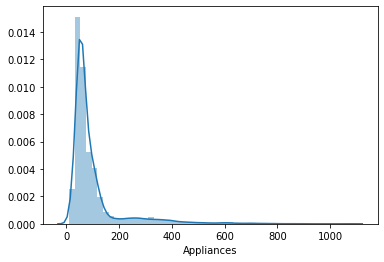

In [10]:
# Energy consumption rating of Appliances. 
sns.distplot(df['Appliances'])

From above results, we can see that most of appliances have a energy consumption rating of below 100 Wh.

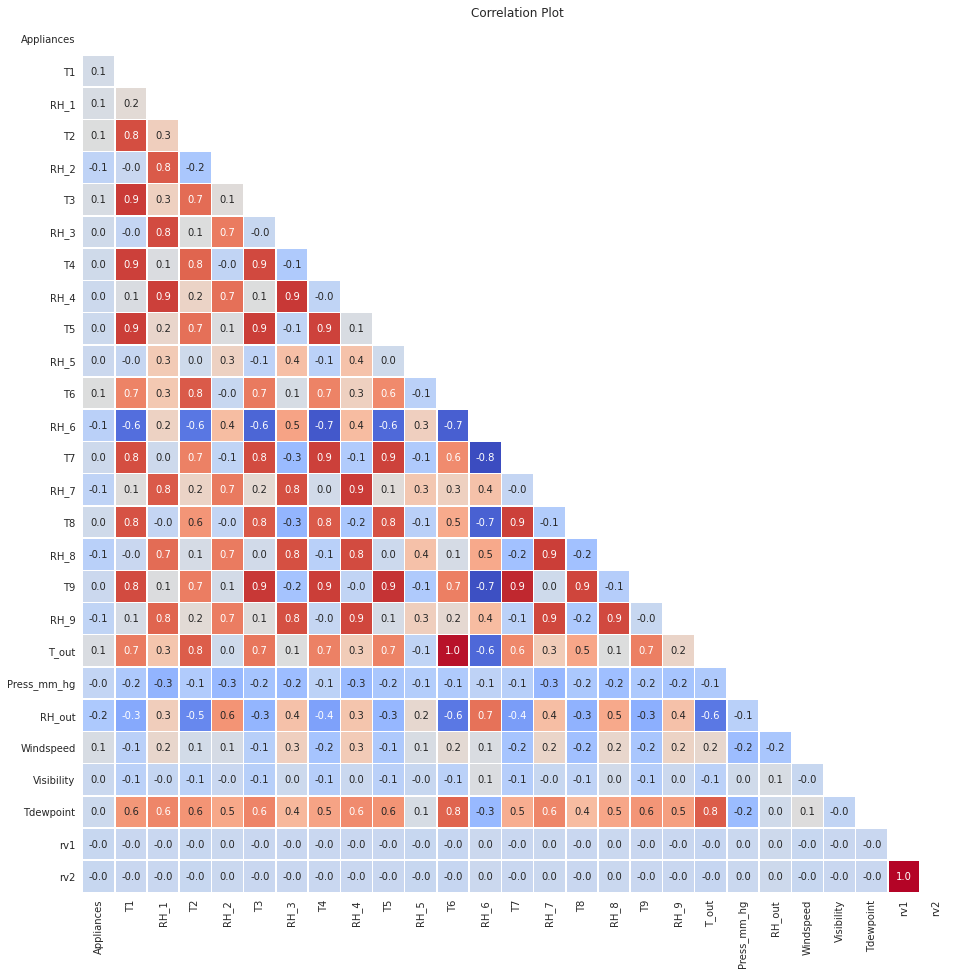

In [11]:
# Correlation plot of continuous variables
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 16))
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, fmt=".1f", linewidths=.5, cbar=False, cmap='coolwarm')

plt.title('Correlation Plot')
plt.show()

From above correlation plot, we can see that there are few variables which are closely related. Since we don't have huge number of variables, we can avoid dropping these features.

Time Series Plot of Energy consumption by Appliances


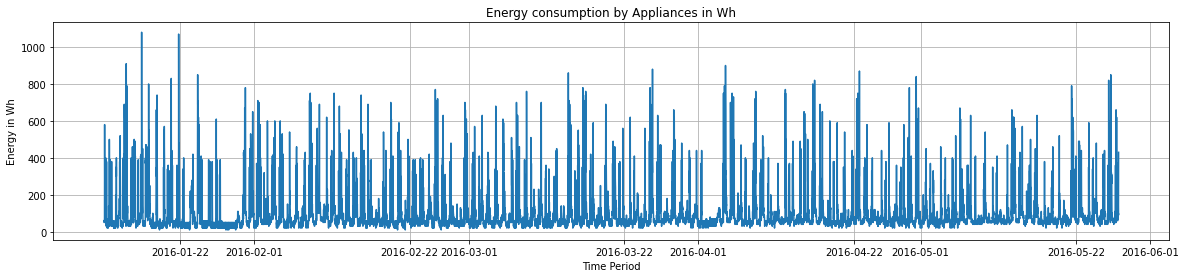

In [12]:
# Visualize time series data
print('Time Series Plot of Energy consumption by Appliances')
plt.figure(figsize=(20,4))
plt.plot(df['Appliances'])
plt.grid(True)
plt.title('Energy consumption by Appliances in Wh')
plt.xlabel('Time Period')
plt.ylabel('Energy in Wh')
plt.show()

## **Distributed Time Lagged FeedForward Networks (TLFN)**

## **Design Model**

In [13]:
# Define function to create seq/label tuples for time window size
def input_data(seq,ws):  # ws is the window size
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out


# Define the model
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=2,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # Add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)
        
        # Initialize h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]  # we only want the last value

## **Prepare Data**

Since we have a huge dataset, it's compputationally too difficult to run this on a cpu. Therefore, we'll focus on 20 days of data to train, validate and test our model.<br>
- For training purposes, we'll use first 10 days of data.<br>
- For validation purposes, we'll use next 5 days of data.<br>
- For testing purposes, we'll use last 5 days of data out of first 20 days of data.<br>
Finally, we'll make predictions for 2 days in future.

In [14]:
# Normalize data
# Instantiate a scaler with a feature range from 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))

In [15]:
# Extract data for training, validation and testing, Normalize and convert it to torch tensors
window_size = 144 # window_size set for training and testing
train_data = torch.FloatTensor(scaler.fit_transform(df.iloc[:1584, :1].values)).view(-1) # first 1440 values - first 10 days data
val_data = torch.FloatTensor(scaler.fit_transform(df.iloc[1440 : 2160, :1].values)).view(-1) # from 1296 (1440-144(window_size)) to 2016(1296+720(new data points)) - 11th - 15th day's data
test_data = torch.FloatTensor(scaler.fit_transform(df.iloc[2016 : 2592, :1].values)).view(-1) # from 1872 (2016-144(window_size)) to 2592(1872+720(new data points)) - 16th - 20th day's data
whole_data = torch.FloatTensor(scaler.fit_transform(df.iloc[ : , :1].values)).view(-1)

print('Shape of train_data', train_data.shape)
print('Shape of val_data', val_data.shape)
print('Shape of test_data', test_data.shape)

Shape of train_data torch.Size([1584])
Shape of val_data torch.Size([720])
Shape of test_data torch.Size([576])


In [16]:
# Split data in sequence of input and labels
train_seq = input_data(train_data,window_size)
val_seq = input_data(val_data,window_size)
test_seq = input_data(test_data,window_size)

## **Build Model**

To build a model, we'll use LSTM model and will train it with leanring rate = 0.0005 and number of epochs = 20. 

In [17]:
# Instantiate the model, define loss and optimization functions
torch.manual_seed(101)
model = LSTMnetwork()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

print(model)

LSTMnetwork(
  (lstm): LSTM(1, 2)
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


## **Train Model**

Epoch 1    Train Loss:  0.0018    Val Loss:  0.0018

Epoch 2    Train Loss:  0.0008    Val Loss:  0.0009

Epoch 3    Train Loss:  0.0000    Val Loss:  0.0001

Epoch 4    Train Loss:  0.0000    Val Loss:  0.0001

Epoch 5    Train Loss:  0.0000    Val Loss:  0.0001

Epoch 6    Train Loss:  0.0000    Val Loss:  0.0001

Epoch 7    Train Loss:  0.0000    Val Loss:  0.0001

Epoch 8    Train Loss:  0.0000    Val Loss:  0.0001

Epoch 9    Train Loss:  0.0000    Val Loss:  0.0001

Epoch 10    Train Loss:  0.0000    Val Loss:  0.0001



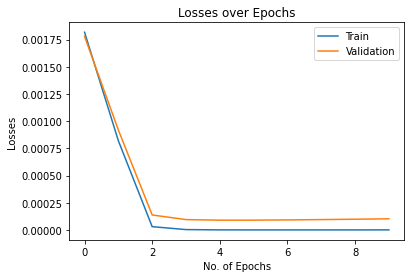

In [18]:
# Train model
n_epochs = 10
train_losses = []
val_losses = []

for epochs in range(n_epochs):
    train_loss = 0
    val_loss1 = 0
    for seq, y_train in train_seq:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))

        # Make predictions
        y_pred = model(seq)

        # Update parameters
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        train_loss += loss
    train_losses.append(loss)

    y_val_true = []
    y_val_preds = []
    for seq, y_val in val_seq:
        
        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))

            # Make predictions
            y_pred = model(seq)
            y_val_true.append(y_val.item())
        
            # Loss calculations
            val_loss = criterion(y_pred, y_val)
            val_loss1 += val_loss 
        y_val_preds.append(y_pred.item())
    val_losses.append(val_loss)
        
    print(f'Epoch {epochs+1}    Train Loss: {loss.item(): .4f}    Val Loss: {val_loss.item(): .4f}')
    print()
    
# Plot the loss curves
plt.plot(train_losses, label='Train')
plt.plot(val_losses, label='Validation')
plt.title('Losses over Epochs')
plt.ylabel('Losses')
plt.xlabel('No. of Epochs')
plt.legend()
plt.show()

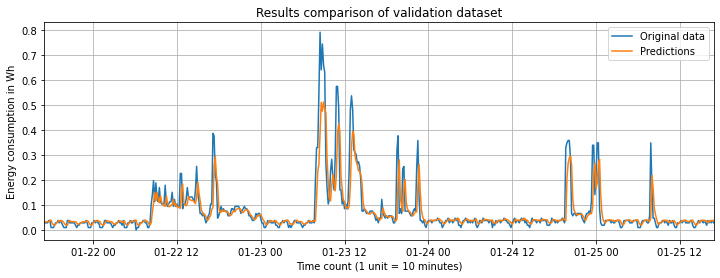

In [19]:
# Prepare X axis to plot the data
x_full = np.arange('2016-01-11 17:00:00', '2016-05-29 18:00:00', dtype='datetime64[10m]')

# Plot data
x = x_full[1440:2016]
plt.figure(figsize=(12, 4))
plt.title('Results comparison of validation dataset')
plt.xlabel('Time count (1 unit = 10 minutes)')
plt.ylabel('Energy consumption in Wh')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(x,y_val_true, label = 'Original data')
plt.plot(x,y_val_preds, label='Predictions')
plt.legend()

## **Evaluate Model**

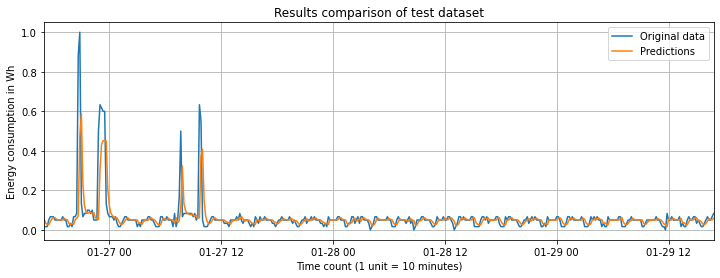

In [20]:
# Get model ready for evaluation
model.eval()
y_test_preds = []
y_test_true = []
for seq, y_test in test_seq:
        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))

            # Make predictions
            y_pred = model(seq)
            y_test_preds.append(y_pred.item())
            y_test_true.append(y_test.item())

            
# Plot data
x = x_full[2160:2592]
plt.figure(figsize=(12, 4))
plt.title('Results comparison of test dataset')
plt.xlabel('Time count (1 unit = 10 minutes)')
plt.ylabel('Energy consumption in Wh')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(x, y_test_true, label = 'Original data')
plt.plot(x, y_test_preds, label='Predictions')
plt.legend()
plt.show()

In [21]:
# Checking metrics on our test data
print(f'Mean Squared Error on test data is {mean_squared_error(y_test_preds, y_test_true): 0.4f}.')

Mean Squared Error on test data is  0.0059.


## **Future Predictions**

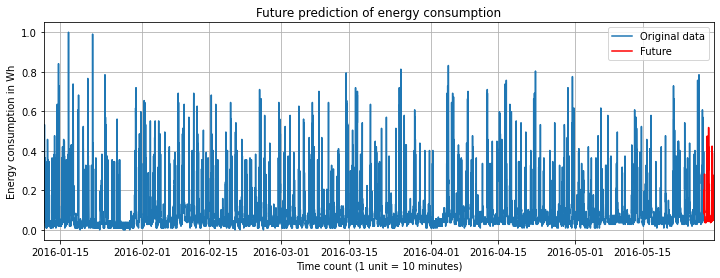

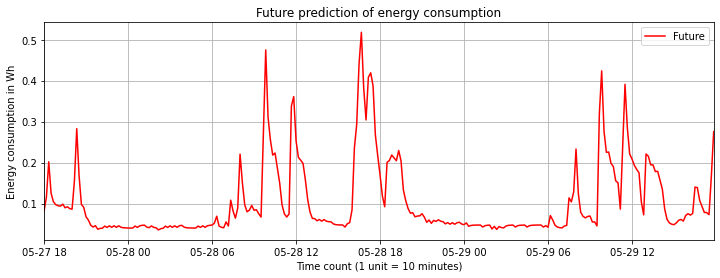

In [22]:
# Getting future data - using last 432 observations # last 3 days data.
future_data = whole_data[-432:]
future_seq = input_data(future_data,window_size)

# Get model ready for evaluation
model.eval()
y_future_preds = []

for seq, y_test in future_seq:
        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_size), torch.zeros(1, 1, model.hidden_size))

            # Make predictions
            y_pred = model(seq)
            y_future_preds.append(y_pred.item())
            

# Plot future data along with given data
x1 = x_full[-288:]
x = x_full[:-287]
plt.figure(figsize=(12, 4))
plt.title('Future prediction of energy consumption')
plt.xlabel('Time count (1 unit = 10 minutes)')
plt.ylabel('Energy consumption in Wh')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(x, whole_data, label = 'Original data')
plt.plot(x1, y_future_preds, 'r', label='Future')
plt.legend()
plt.show()

# Plot future predictions data only
x1 = x_full[-288:]
plt.figure(figsize=(12, 4))
plt.title('Future prediction of energy consumption')
plt.xlabel('Time count (1 unit = 10 minutes)')
plt.ylabel('Energy consumption in Wh')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(x1, y_future_preds, 'r', label='Future')
plt.legend()
plt.show()

In [24]:
# convert time from numpy to list
x1_list = list(x1)

# convert numpy time to pandas time
from datetime import datetime
lst = []
for i in range(len(x1_list)):
    dt64 = np.datetime64(x1_list[i])
    ts = (dt64 - np.datetime64('1970-01-01T00:00:00Z')) / np.timedelta64(1, 's')
    lst.append(datetime.utcfromtimestamp(ts))

# Inverse transform normalized prediction values.
y_future_preds_arr = (np.asarray(y_future_preds)).reshape(-1,1) 
y_future_preds_act = scaler.inverse_transform(y_future_preds_arr)

# Prepare a dataframe to extract the future predictions in a csv file
future_predictions = pd.DataFrame(lst, columns=['Date_time'])
future_predictions['Energy_consumption'] = y_future_preds_act
future_predictions.to_csv('future_predictions.csv', index=False)
future_predictions.head()

,Date_time,Energy_consumption
0,2016-05-27 18:00:00,97.230233
1,2016-05-27 18:10:00,133.609390
2,2016-05-27 18:20:00,226.086132
3,2016-05-27 18:30:00,144.104026
4,2016-05-27 18:40:00,121.679390


Finally, we can see the pattern of energy consumption in future and we have the acutal values of energy consumption. These values can be extracted in a table and can be used further.